In [1]:
print(format('How to use LightGBM Classifier and Regressor in Python','*^82'))    

**************How to use LightGBM Classifier and Regressor in Python**************


In [2]:
import warnings
warnings.filterwarnings("ignore")
    
# load libraries
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split

import lightgbm as ltb

lightgbm.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=-1, silent=True, importance_type='split', **kwargs)

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html

# Parameters Tuning

# For Faster Speed
Use bagging by setting bagging_fraction and bagging_freq
Use feature sub-sampling by setting feature_fraction
Use small max_bin
Use save_binary to speed up data loading in future learning
Use parallel learning, refer to Parallel Learning Guide
# For Better Accuracy

Use large max_bin (may be slower) 
Use small learning_rate with large num_iterations
Use large num_leaves (may cause over-fitting)
Use bigger training data
Try dart
# Deal with Over-fitting

Use small max_bin
Use small num_leaves
Use min_data_in_leaf and min_sum_hessian_in_leaf
Use bagging by set bagging_fraction and bagging_freq
Use feature sub-sampling by set feature_fraction
Use bigger training data
Try lambda_l1, lambda_l2 and min_gain_to_split for regularization
Try max_depth to avoid growing deep tree
Try extra_trees

https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

For example : https://www.kaggle.com/garethjns/microsoft-lightgbm-with-parameter-tuning-0-823

# Iris Dataset

In [3]:
# load the iris datasets
dataset = datasets.load_breast_cancer()
X = dataset.data; y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
 
# fit a lightGBM model to the data
model = ltb.LGBMClassifier()
model.fit(X_train, y_train)
print(model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [4]:
# make predictions
expected_y  = y_test
predicted_y = model.predict(X_test)
    
# summarize the fit of the model
print(metrics.classification_report(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        60
           1       0.96      0.98      0.97        83

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [5]:
print(metrics.confusion_matrix(expected_y, predicted_y))

[[57  3]
 [ 2 81]]


# Boston dataset

In [6]:
# load the boston datasets
dataset = datasets.load_boston()
X = dataset.data; y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)    
    
# fit a lightGBM model to the data
model = ltb.LGBMRegressor()
model.fit(X_train, y_train)
print(model)
 

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [7]:
# make predictions
expected_y  = y_test
predicted_y = model.predict(X_test)
    
# summarize the fit of the model
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))

0.8178084696241135
0.02468777313754046


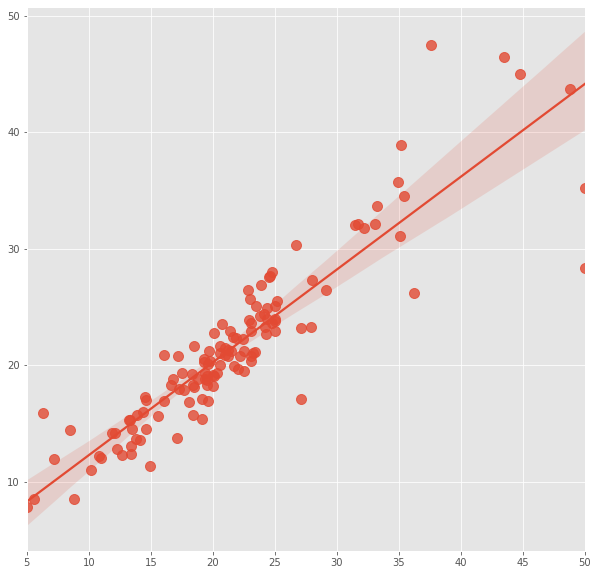

In [8]:
import matplotlib.pyplot as plt    
plt.style.use('ggplot')

import seaborn as sns

plt.figure(figsize=(10,10))         
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})